# Unit 12 - Tales from the Crypto

## Imports

In [58]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
from dotenv import load_dotenv
from collections import Counter

from newsapi import NewsApiClient
from nltk import ngrams
from wordcloud import WordCloud

# custom files
from news_sentiment import headlines_sentiment
from text_processor import process_text

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles

# Had to use get_everything endpoint because there were 0 articles in get_latest_headlines endpoint
btc_headlines = newsapi.get_everything(q="bitcoin", from_param="2021-11-15", language="en", sort_by="relevancy",page_size=100)
print(f"Total articles about bitcoin: {btc_headlines['totalResults']}")
btc_headlines

Total articles about bitcoin: 2244


{'status': 'ok',
 'totalResults': 2244,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': None,
   'title': "Explainer: What we know so far about El Salvador's volcano-powered bitcoin bond - Reuters",
   'description': 'El Salvador plans to build the world\'s first <a href="https://www.reuters.com/markets/rates-bonds/el-salvador-plans-first-bitcoin-city-backed-by-bitcoin-bonds-2021-11-21" target="_blank">"Bitcoin City"</a> with money from a $1 billion bitcoin-backed bond the …',
   'url': 'https://www.reuters.com/markets/us/what-we-know-so-far-about-el-salvadors-volcano-powered-bitcoin-bond-2021-11-22/',
   'urlToImage': 'https://www.reuters.com/pf/resources/images/reuters/reuters-default.png?d=59',
   'publishedAt': '2021-11-22T23:35:00Z',
   'content': 'MIZATA, El Salvador/LONDON, Nov 22 (Reuters) - El Salvador plans to build the world\'s first "Bitcoin City" with money from a $1 billion bitcoin-backed bond the country\'s President Nayib Bukele said o… [+314

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", from_param="2021-11-15", language="en", sort_by="relevancy", page_size=100)
print(f"Total articles about ethereum: {eth_headlines['totalResults']}")
eth_headlines

Total articles about ethereum: 927


{'status': 'ok',
 'totalResults': 927,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Mitchell Clark',
   'title': 'The NFT Bay asks if you would steal all the JPEGs',
   'description': 'The NFT Bay is an incredible piece of performance art that promises to let you download all the NFTs on the Ethereum blockchain. The torrent contains nearly 20TB worth of files, and works as a commentary on collecting and owning.',
   'url': 'https://www.theverge.com/2021/11/18/22790131/nft-bay-pirating-digital-ownership-piracy-crypto-art-right-click',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/UMHdxnP0BlxxYxbIu9Ea5K1QwGk=/0x0:2028x1062/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23025815/Screen_Shot_2021_11_18_at_14.21.58.png',
   'publishedAt': '2021-11-19T02:01:07Z',
   'content': 'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has

In [19]:
# Create the Bitcoin sentiment scores DataFrame

btc_df = pd.DataFrame(headlines_sentiment(btc_headlines))

#Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols].set_index('date')

btc_df.head()


,text,compound,positive,negative,neutral
date,,,,,
2021-11-22,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",0.0000,0.000,0.000,1.000
2021-11-22,Posted \r\nAfter becoming the first country to...,0.4767,0.136,0.000,0.864
2021-11-22,Spotify has removed the shuffle button from al...,0.0000,0.000,0.000,1.000
2021-11-17,Australian Baseball League club Perth Heat wil...,-0.1027,0.000,0.043,0.957
2021-11-16,Representations of the virtual currency Bitcoi...,0.0000,0.000,0.000,1.000


In [20]:
# Create the Ethereum sentiment scores DataFrame

eth_df = pd.DataFrame(headlines_sentiment(eth_headlines))

#Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols].set_index('date')

eth_df.head()


,text,compound,positive,negative,neutral
date,,,,,
2021-11-19,"If you claim ownership, someone will probably ...",0.7783,0.216,0.000,0.784
2021-11-19,Bitcoin has lost almost 20 per cent in less th...,-0.3182,0.000,0.062,0.938
2021-11-19,"Image source, Getty Images\r\nImage caption, T...",0.0772,0.070,0.062,0.867
2021-11-18,"Hours ago, a website appeared online with the ...",0.0000,0.000,0.000,1.000
2021-11-16,An American Airlines Airbus A321-200 plane tak...,0.0000,0.000,0.000,1.000


In [21]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.066478,0.054150,0.038270,0.907600
std,0.392513,0.058587,0.060007,0.077323
min,-0.831600,0.000000,0.000000,0.728000
25%,-0.044250,0.000000,0.000000,0.856000
50%,0.000000,0.047000,0.000000,0.911000
75%,0.361200,0.081250,0.062000,1.000000
max,0.857300,0.246000,0.229000,1.000000


In [22]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.171998,0.064550,0.027570,0.907870
std,0.385315,0.072674,0.047856,0.085338
min,-0.831600,0.000000,0.000000,0.536000
25%,0.000000,0.000000,0.000000,0.861000
50%,0.094300,0.056000,0.000000,0.917500
75%,0.498075,0.102250,0.054500,1.000000
max,0.845800,0.299000,0.218000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

* ETH, with a mean positive score of 0.064550

Q: Which coin had the highest compound score?

* BTC, with a max compound score of 0.857300

Q. Which coin had the highest positive score?

* ETH, with a max positive score of 0.299000

---

## 2. Natural Language Processing

###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [100]:
# Create a list of stopwords
sw_custom = {'char','said','million','billion','reuters','ha','u', 'say', 'wa', 'nov','dollar','week','month', "monday", 'day', 'wednesday', 'friday', 'tuesday'}

In [101]:
# Run the text_processor function for Bitcoin headlines
btc_tokenized = [process_text(text, sw_custom) for text in btc_df['text']]

# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_tokenized
btc_df.head(3)

,text,compound,positive,negative,neutral,tokens
date,,,,,,
2021-11-22,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",0.0000,0.000,0.0,1.000,"[mizata, el, salvadorlondon, el, salvador, pla..."
2021-11-22,Posted \r\nAfter becoming the first country to...,0.4767,0.136,0.0,0.864,"[posted, becoming, first, country, accept, cry..."
2021-11-22,Spotify has removed the shuffle button from al...,0.0000,0.000,0.0,1.000,"[spotify, removed, shuffle, button, album, pag..."


In [102]:
# Run the text_processor function for Ethereum headlines
eth_tokenized = [process_text(text, sw_custom) for text in eth_df['text']]

# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_tokenized
eth_df.head(3)

,text,compound,positive,negative,neutral,tokens
date,,,,,,
2021-11-19,"If you claim ownership, someone will probably ...",0.7783,0.216,0.000,0.784,"[claim, ownership, someone, probably, want, ta..."
2021-11-19,Bitcoin has lost almost 20 per cent in less th...,-0.3182,0.000,0.062,0.938,"[bitcoin, lost, almost, per, cent, le, two, pr..."
2021-11-19,"Image source, Getty Images\r\nImage caption, T...",0.0772,0.070,0.062,0.867,"[image, source, getty, imagesimage, caption, g..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [103]:
# Define functions to generate N-grams and top 10 tokens

# Function token_count generates the top 10 words for a given coin
def token_count(tokens, n_results):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(map(str,tokens))
    processed = process_text(big_string, sw_custom)
    topN = dict(Counter(processed).most_common(n_results))
    return pd.DataFrame(list(topN.items()), columns=['Word', 'Count']).set_index('Word')

# Function bigrams_counter retrieves bigrams in a list of texts
def bigrams_counter(texts, n_results): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(texts)
    processed = process_text(big_string, sw_custom)
    bigrams = ngrams(processed, n=2)
    top = dict(Counter(bigrams).most_common(n_results))
    return pd.DataFrame(list(top.items()), columns=['Bigram', 'Count']).set_index('Bigram')

In [104]:
# Generate the Bitcoin N-grams where N=2
bigrams_counter(btc_df['text'], 10)

,Count
Bigram,
"(el, salvador)",8
"(bitcoin, city)",7
"(nayib, bukele)",6
"(president, nayib)",5
"(picture, illustration)",5
"(new, york)",5
"(plan, build)",4
"(world, first)",4
"(illustration, taken)",4


In [105]:
# Generate the Ethereum N-grams where N=2
bigrams_counter(eth_df['text'], 10)

,Count
Bigram,
"(copy, us)",5
"(us, constitution)",5
"(every, nft)",5
"(shiba, inucryptoshib)",5
"(nft, ethereum)",4
"(cryptocurrency, market)",4
"(bitcoin, ethereum)",4
"(created, website)",3
"(los, angeles)",3


In [106]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens_top10 =  token_count(btc_df['tokens'], 10)
btc_tokens_top10

,Count
Word,
bitcoin,39
cryptocurrency,19
world,13
crypto,13
president,12
new,12
city,11
london,11
el,10


In [107]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens_top10 =  token_count(eth_df['tokens'], 10)
eth_tokens_top10

#noticed that lemmatizer doesn't lemmatize "cryptocurrencies"

,Count
Word,
cryptocurrency,33
bitcoin,26
crypto,22
market,18
cryptocurrencies,17
price,16
ethereum,16
investor,15
digital,12


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

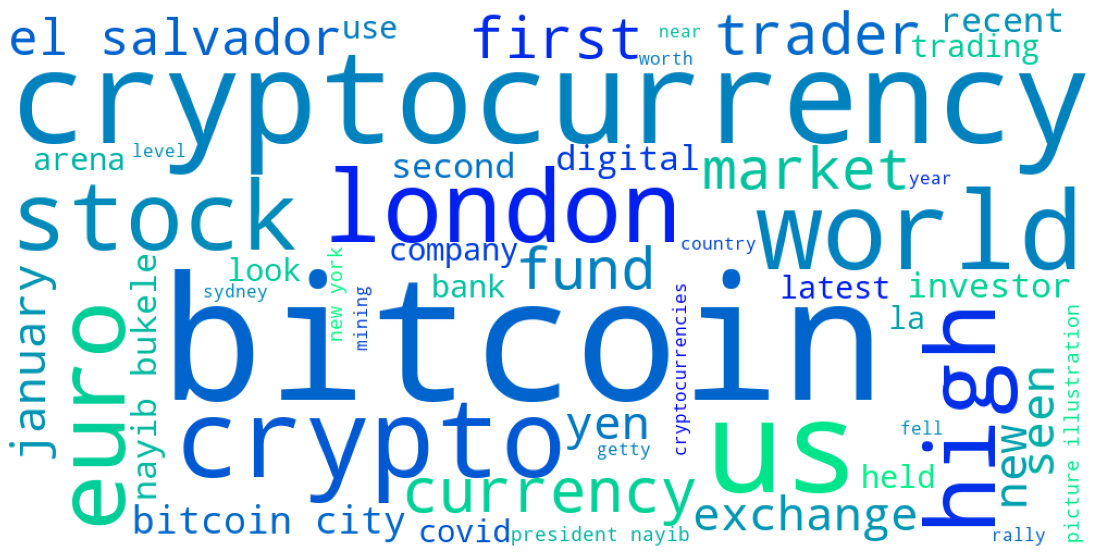

In [146]:
# Generate the Bitcoin word cloud

big_string = ' '.join(btc_df['text'])
input_text = process_text(big_string, sw_custom)

wc = WordCloud(max_words=50, width=1000, height=500, background_color="white", colormap="winter").generate(' '.join(input_text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc)

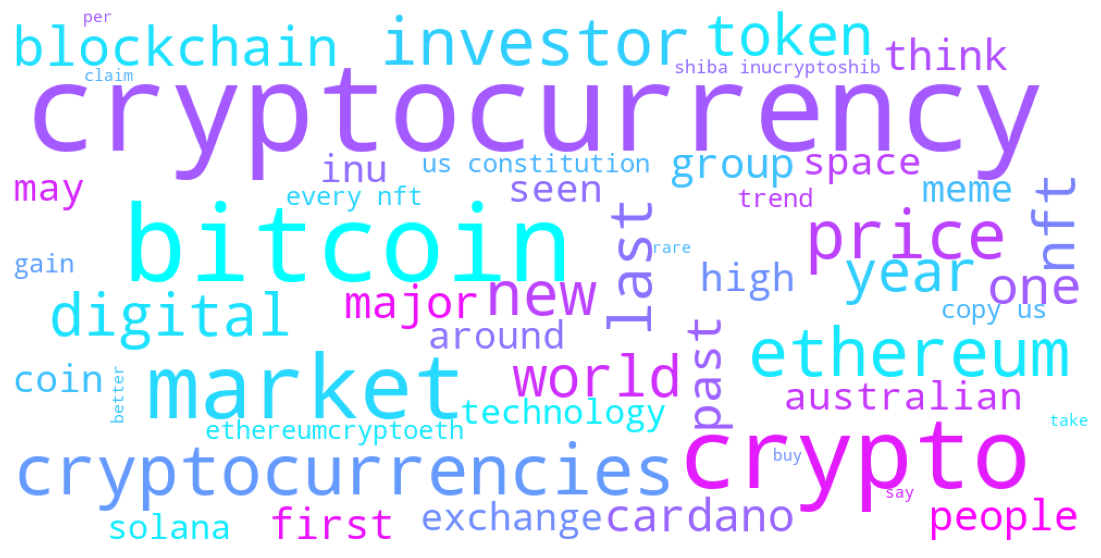

In [143]:
# Generate the Ethereum word cloud

big_string = ' '.join(eth_df['text'])
input_text = process_text(big_string, sw_custom)

wc = WordCloud(max_words=50, width=1000, height=500, background_color="white", colormap="cool").generate(' '.join(input_text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---